# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

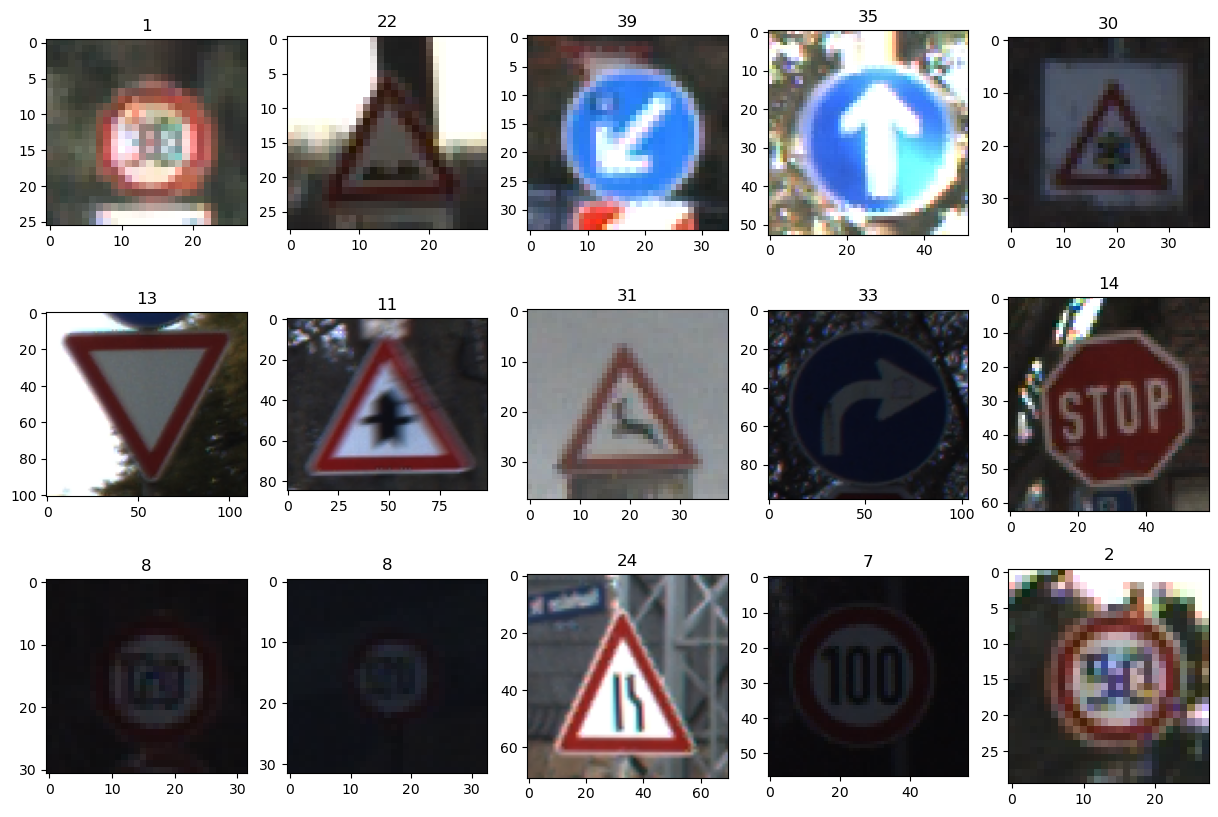

In [2]:
# Load the training labels
root = 'archive/' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [3]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId']

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

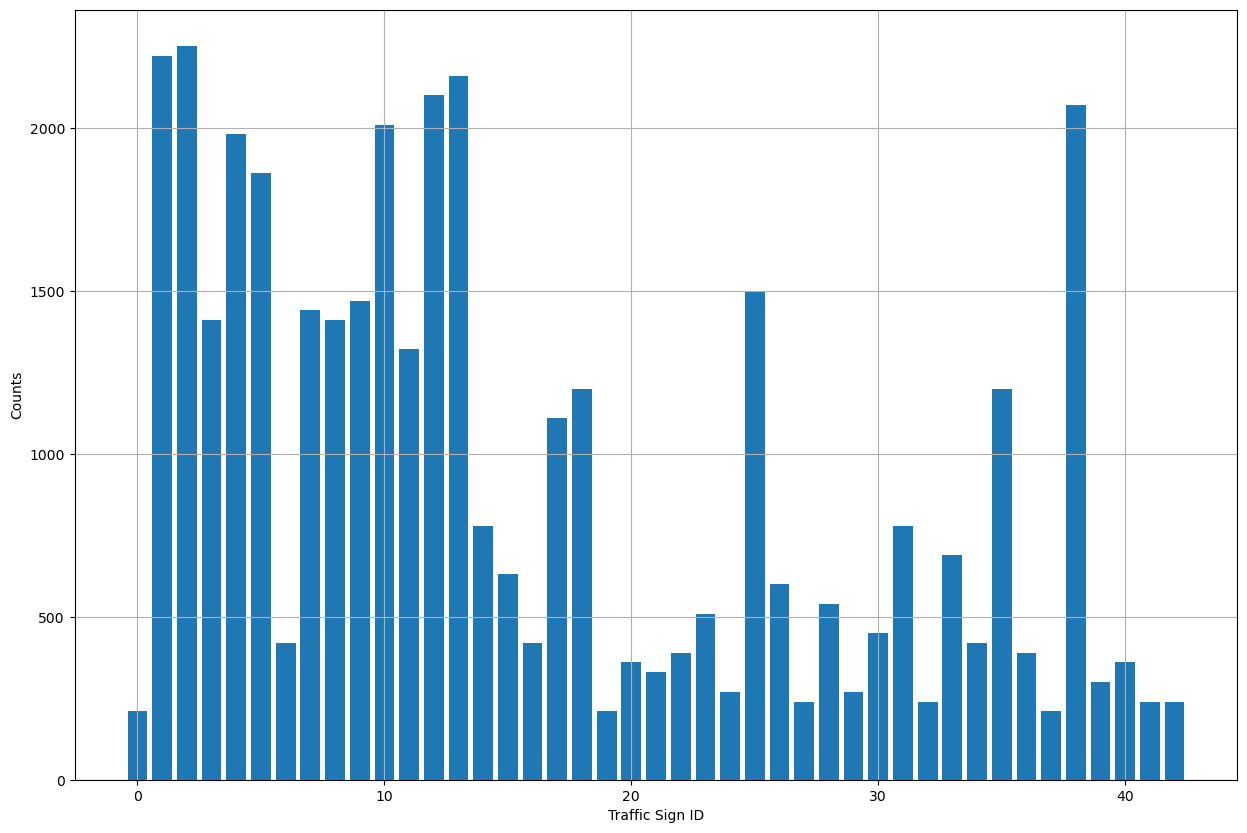

In [4]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?

`Not really. Because there are many classes where data is 10 times less than in the class with the maximum samples count and vice versa too.
But on the other side the classes with the minimum samples count have rather enough samples (~210 pc.) and perhaps the class distribution reflecting the real world`

* Are there any classes that are (significantly) over-represented or under-represeneted?

`Yes, there are. The most of the dataset classes are under-represeneted, and about 10 are over-represented (histogram bellow)`

(Text(0.5, 0, 'Classes'), Text(0, 0.5, 'counts'))

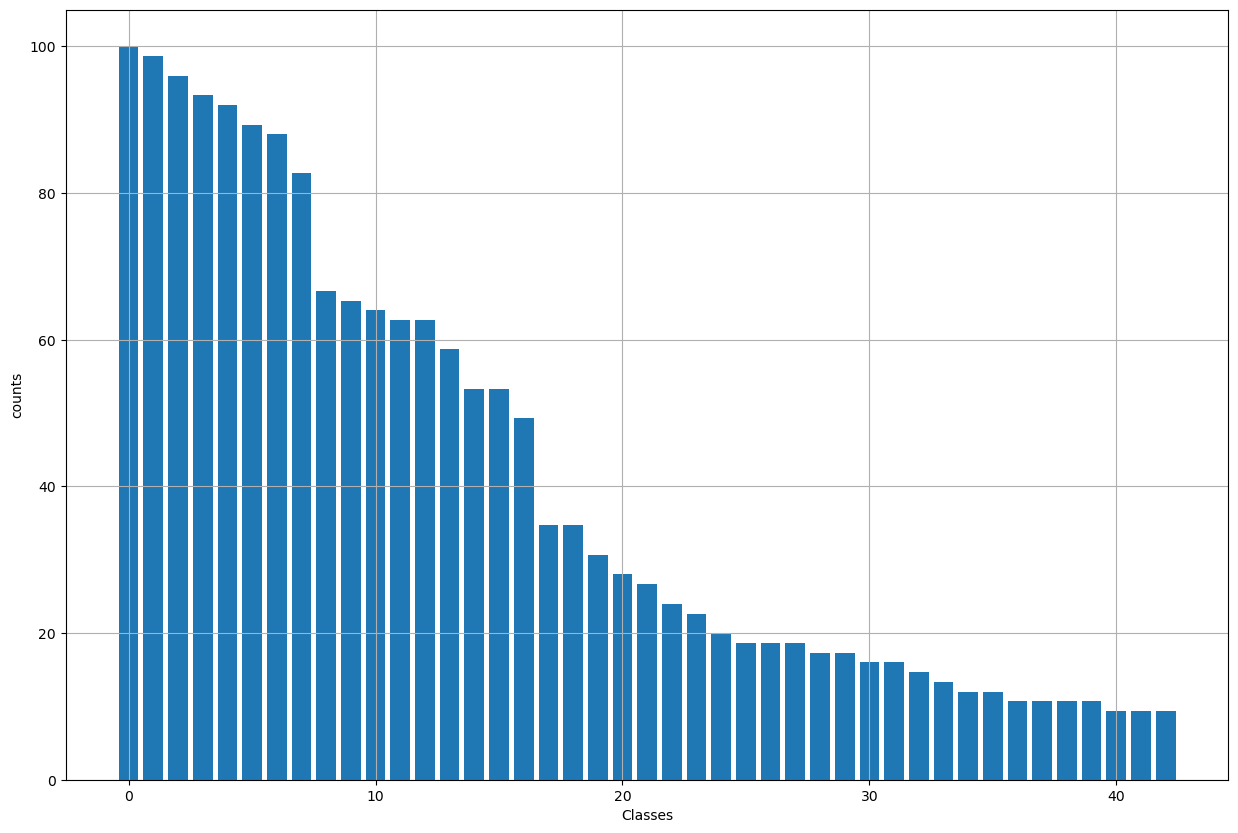

In [5]:
ids = data['ClassId'].value_counts()
ids = (ids / ids.max()) * 100
centers = np.arange(0, len(ids) + 1)
plt.bar(centers[:-1], ids), plt.grid(True)
plt.xlabel('Classes'), plt.ylabel('counts')

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?

`Sure! Let's analize what are the range of resolutions there and how many images of them`

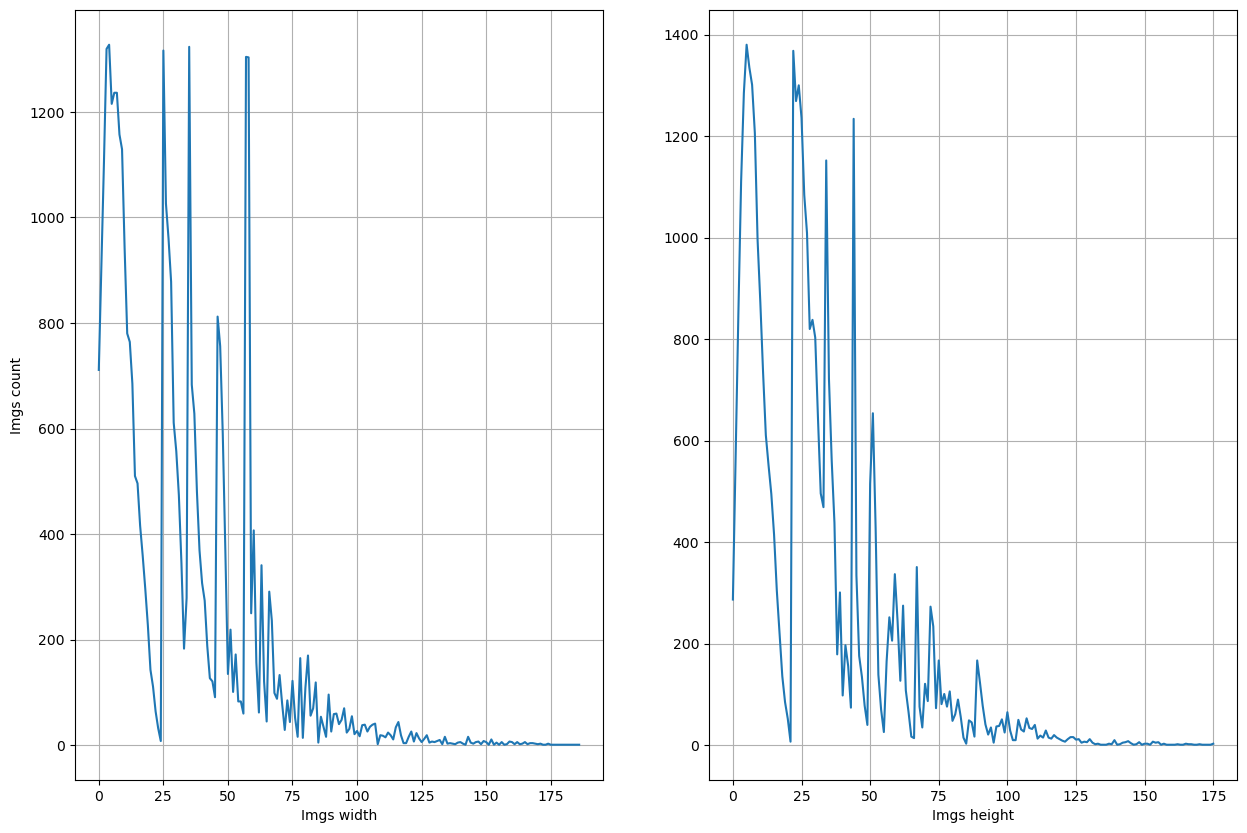

In [6]:
hist_w = Counter(data['Width'])
hist_h = Counter(data['Height'])

# Plot a simple line chart
plt.subplot(121), plt.plot(np.arange(len(hist_w.keys())), hist_w.values())
plt.grid(True), plt.xlabel('Imgs width'), plt.ylabel('Imgs count')

# Plot another line on the same chart/graph
plt.subplot(122), plt.plot(np.arange(len(hist_h.keys())), hist_h.values())
plt.grid(True), plt.xlabel('Imgs height')

plt.show()

`It looks like there are more small pictures (~25x25, 50x50) than medium ones (~150x150). And there aren't any big images (700-1000 px)`

Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

In [7]:
def isbright(image, dim=10, thresh=0.5):
    # Resize image to 10x10
    image = cv2.resize(image, (dim, dim))
    # Convert color space to LAB format and extract L channel
    L, A, B = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    # Normalize L channel by dividing all pixel values with maximum pixel value
    L = L/np.max(L)
    # Return True if mean is greater than thresh else False
    return int(np.mean(L) * 5)

brightness = np.empty([num_samples])
from tqdm import tqdm
for ii in tqdm(range(num_samples)):
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[ii]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    brightness[ii] = isbright(img)

100%|██████████| 39209/39209 [00:16<00:00, 2310.91it/s]


(Text(0.5, 0, 'Brightness level'), Text(0, 0.5, 'Counts'))

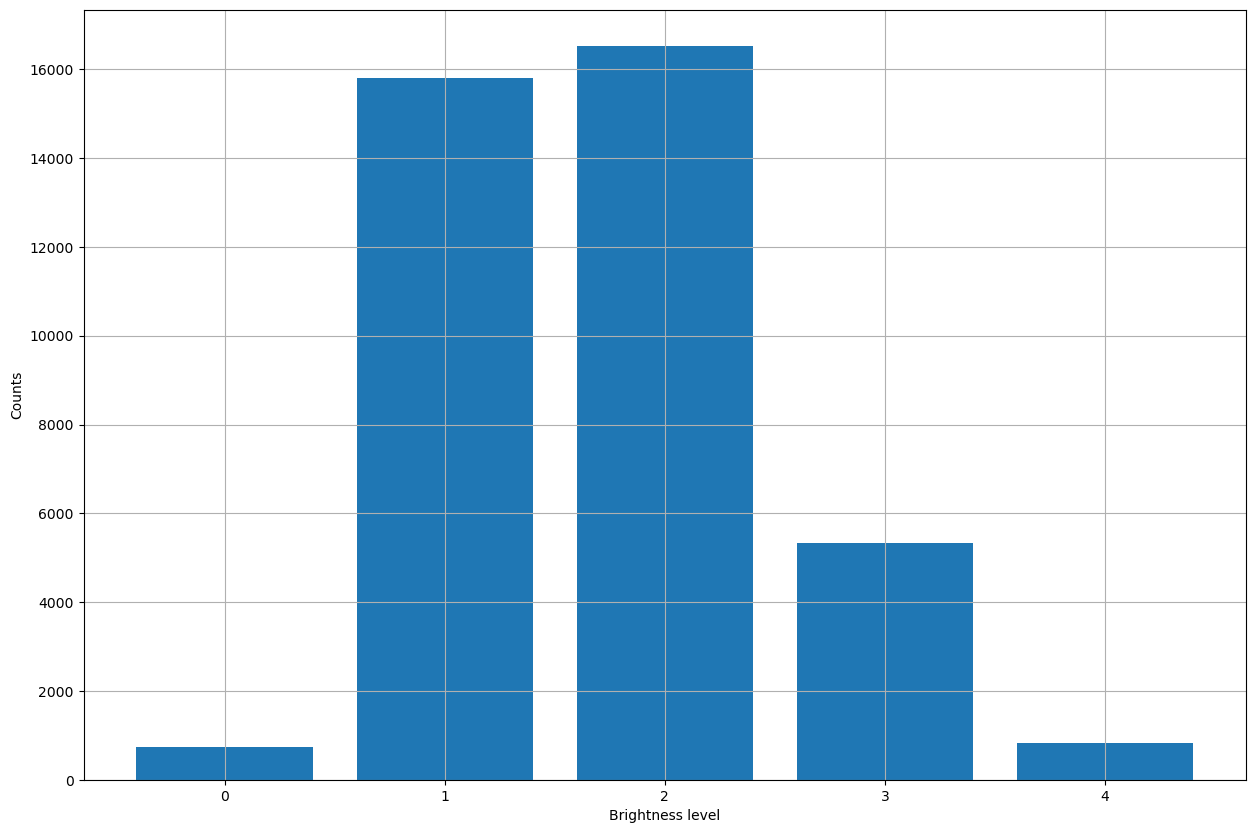

In [8]:
hist = Counter(brightness)
plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Brightness level'), plt.ylabel('Counts')

`There aren't many overbighten or umderbrighten samples. Boyh of them only <1000 pcs.`